In [1]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('iris.data', header=None, sep=',', na_values=' ?').dropna()
df.columns = ['sepal_length', 'sepal_width',
              'petal_length', 'petal_width', 'class']
X = df.drop("class", axis=1)
y = df['class']

le = LabelEncoder()
df["class"] = le.fit_transform(df["class"])


In [2]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## PCA 分群狀況視覺化

In [3]:
def PCA_illustrator(X ,label, title):
    from sklearn.decomposition import PCA
    from matplotlib.font_manager import FontProperties
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
    plt.rcParams['axes.unicode_minus'] = False
    # 上面這兩句有設應該就行了
    pca = PCA(2)
    data = pca.fit_transform(X)
    uniq = np.unique(label)   
    plt.figure(figsize=(10,10))
    for i in uniq:
        plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
    #This is done to find the centroid for each clusters.
    plt.legend()
    plt.title(title)
    plt.show()

## DBSCAN 最佳距離判斷圖

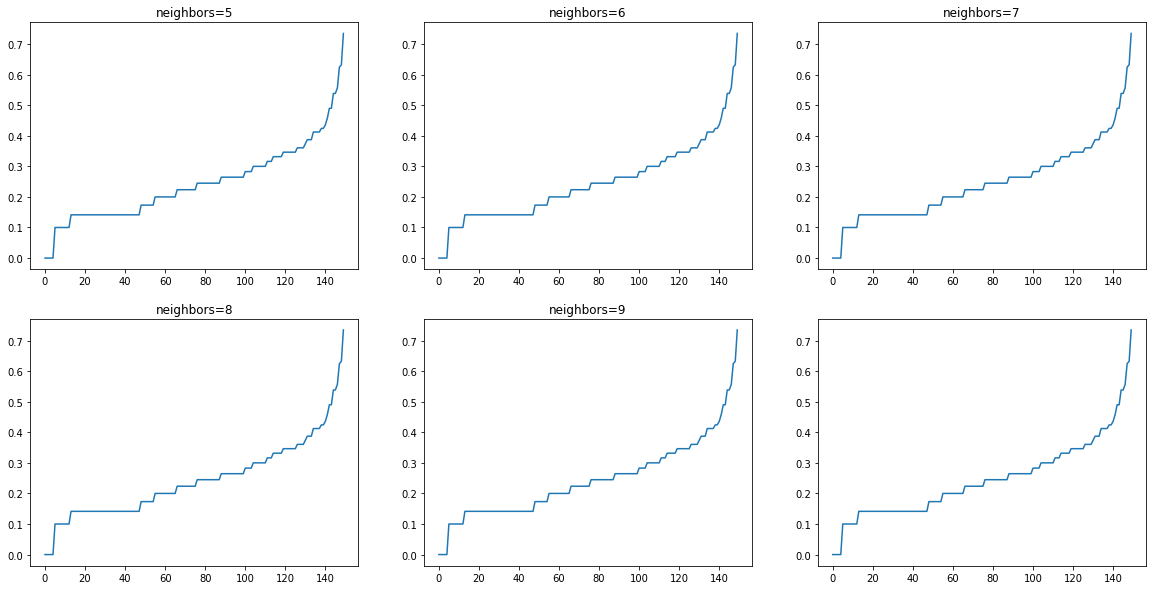

In [4]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

def Best_eps(X, min=4, max=10):
    if not(max - min == 6):
        print('範圍必須等於6')
    else:
        plt.figure(figsize=(20,10))
        for i in range(4, 10):
            neighbors = NearestNeighbors(n_neighbors=i)
            neighbors_fit = neighbors.fit(X)
            distances, indices = neighbors_fit.kneighbors(X)

            distances = np.sort(distances, axis=0)
            distances = distances[:,1]
            plt.title(f'neighbors={i}')
            plt.subplot(2, 3, i - 3)
            plt.plot(distances)
        plt.show()

Best_eps(X)

## 運行時間


In [5]:
if __name__ == '__main__':
    def k_mean():
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=3)
        kmeans.fit(X)
        pred_y = kmeans.predict(X)
        centroids = kmeans.cluster_centers_
        return pred_y

    def AgglomerativeClustering():
        from sklearn.cluster import AgglomerativeClustering
        ml = AgglomerativeClustering(
            n_clusters=3, affinity='euclidean', linkage='ward')
        pred_y = ml.fit_predict(X)
        return pred_y

    def DBSCAN(eps = 0.3, min_samples = 6):
        from sklearn.cluster import DBSCAN
        clustering = DBSCAN(eps = eps, min_samples = min_samples).fit(X)
        pred_y = clustering.labels_
        return pred_y


In [6]:
from timeit import timeit

X = df.drop("class", axis=1)
y = df['class']
le = LabelEncoder()
df["class"] = le.fit_transform(df["class"])
clusterList = ['k_mean', 'AgglomerativeClustering', 'DBSCAN']
for cluster in clusterList:
    t = timeit(f'{cluster}()', f'from __main__ import {cluster}', number=1)
    print(cluster, t)


k_mean 0.2674546000000002
AgglomerativeClustering 0.014322199999999619
DBSCAN 0.006635400000000402


## 純度


In [7]:
kmean_purity_list = []
Agglo_purity_list = []
DBSCAN_purity_list = []

In [8]:
#直接算純度

le = LabelEncoder()
df["class"] = le.fit_transform(df["class"])

X = df.drop("class", axis=1)
y = df['class']


def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)


kmean_purity = purity_score(y, k_mean())
AgglomerativeClustering_purity = purity_score(y, AgglomerativeClustering())
DBSCAN_purity = purity_score(y, DBSCAN())
print("kmean_purity", kmean_purity, "\nAgglomerativeClustering_purity",
      AgglomerativeClustering_purity, "\nDBSCAN_purity", DBSCAN_purity)

kmean_purity_list.append(kmean_purity)
Agglo_purity_list.append(AgglomerativeClustering_purity)
DBSCAN_purity_list.append(DBSCAN_purity)


kmean_purity 0.8933333333333333 
AgglomerativeClustering_purity 0.8933333333333333 
DBSCAN_purity 0.6266666666666667


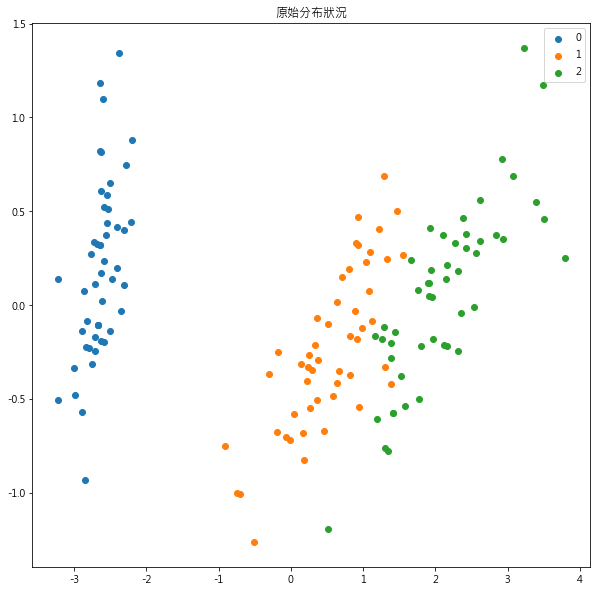

In [9]:
PCA_illustrator(X ,y, '原始分布狀況')

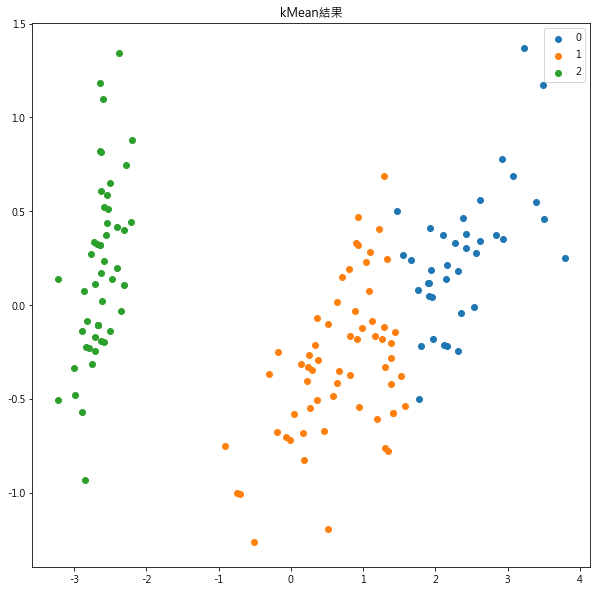

In [10]:
PCA_illustrator(X ,k_mean(), 'kMean結果')

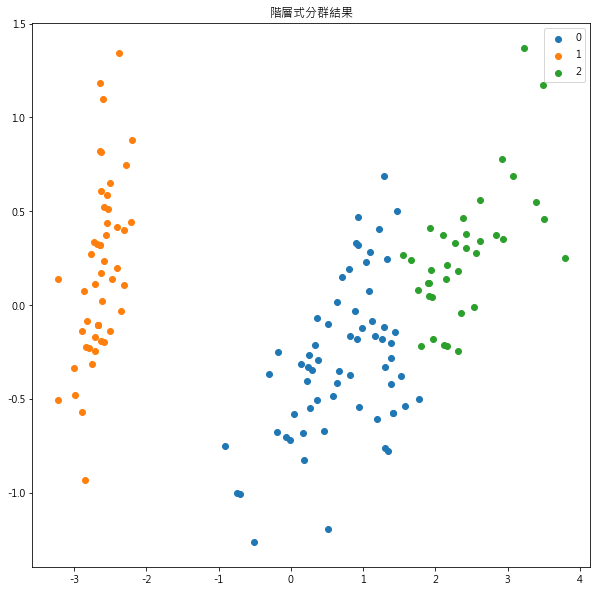

In [11]:
PCA_illustrator(X ,AgglomerativeClustering(), '階層式分群結果')

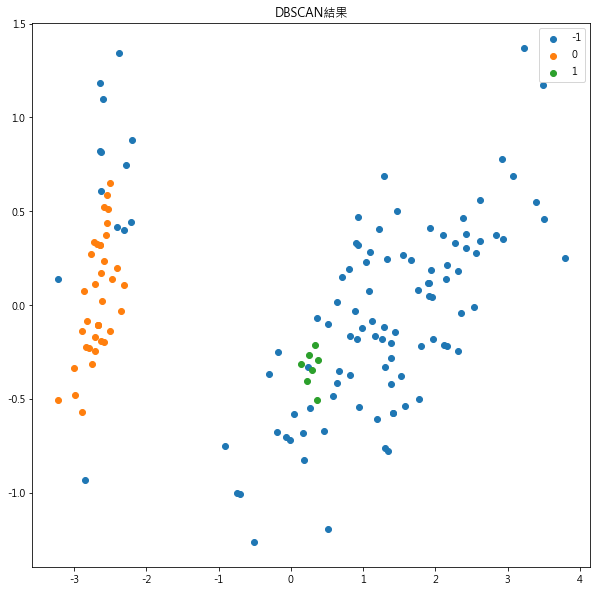

In [12]:
PCA_illustrator(X ,DBSCAN(), 'DBSCAN結果')

## MAX-min標準化

In [13]:
#做 MAX-min標準化後純度
from sklearn.preprocessing import MinMaxScaler


le = LabelEncoder()
df["class"] = le.fit_transform(df["class"])

X = df.drop("class", axis=1)
y = df['class']

min_max = MinMaxScaler()
X = pd.DataFrame(min_max.fit_transform(X), columns=X.columns)

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)


kmean_purity = purity_score(y, k_mean())
AgglomerativeClustering_purity = purity_score(y, AgglomerativeClustering())
DBSCAN_purity = purity_score(y, DBSCAN(eps=0.1, min_samples=7))
print("kmean_purity", kmean_purity, "\nAgglomerativeClustering_purity",
      AgglomerativeClustering_purity, "\nDBSCAN_purity", DBSCAN_purity)

kmean_purity_list.append(kmean_purity)
Agglo_purity_list.append(AgglomerativeClustering_purity)
DBSCAN_purity_list.append(DBSCAN_purity)

kmean_purity 0.8866666666666667 
AgglomerativeClustering_purity 0.8866666666666667 
DBSCAN_purity 0.66


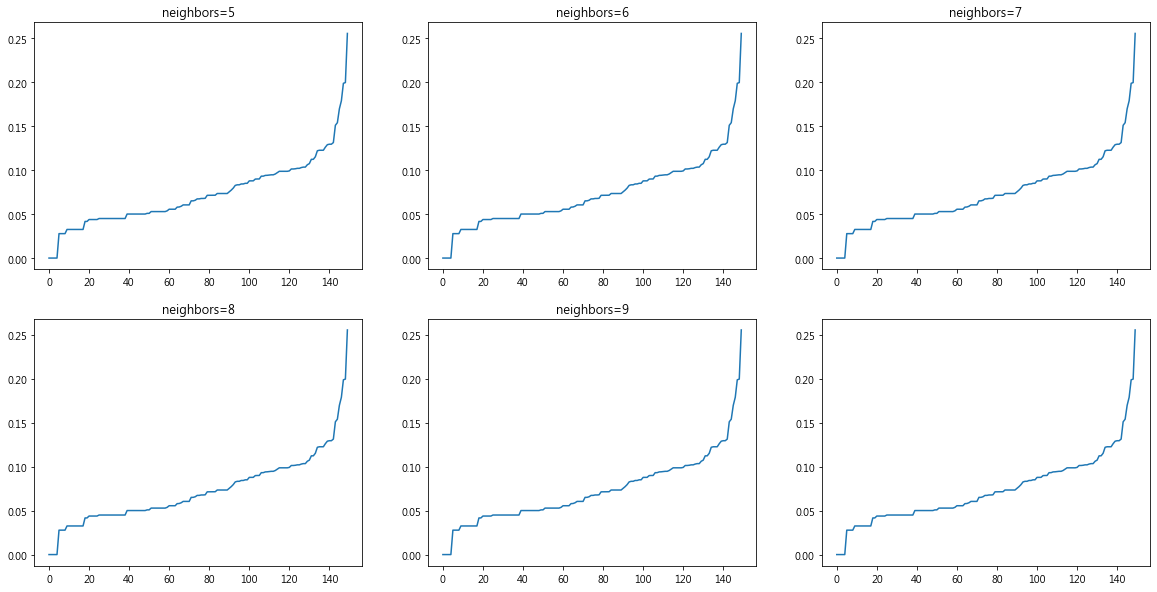

In [14]:
Best_eps(X)

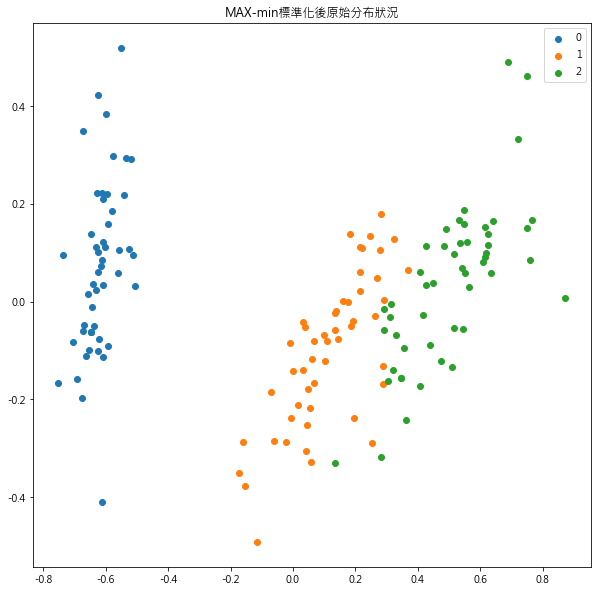

In [15]:
PCA_illustrator(X , y, 'MAX-min標準化後原始分布狀況')

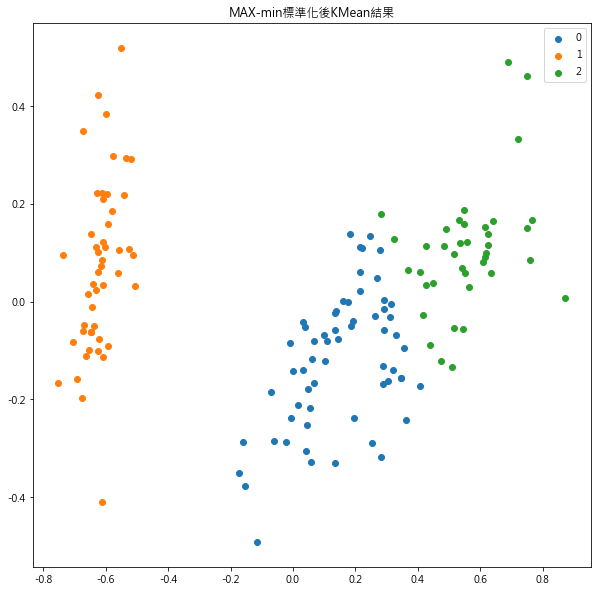

In [16]:
PCA_illustrator(X ,k_mean(), 'MAX-min標準化後KMean結果')

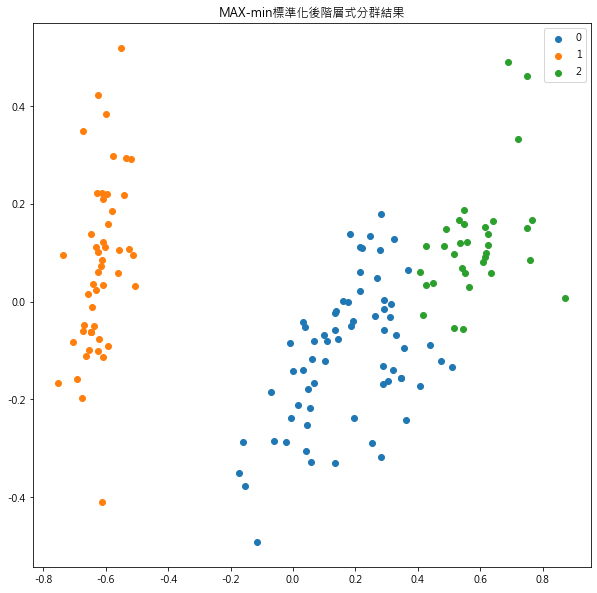

In [17]:
PCA_illustrator(X ,AgglomerativeClustering(), 'MAX-min標準化後階層式分群結果')

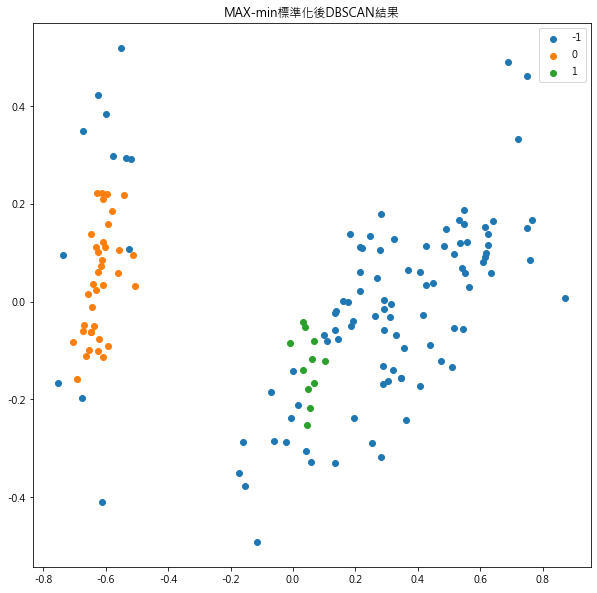

In [18]:
PCA_illustrator(X ,DBSCAN(eps=0.1, min_samples=7), 'MAX-min標準化後DBSCAN結果')

## z-score 標準化

In [19]:
# z-score 標準化後純度
from sklearn.preprocessing import StandardScaler


le = LabelEncoder()
df["class"] = le.fit_transform(df["class"])
X = df.drop("class", axis=1)
y = df['class']

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)


kmean_purity = purity_score(y, k_mean())
AgglomerativeClustering_purity = purity_score(y, AgglomerativeClustering())
DBSCAN_purity = purity_score(y, DBSCAN(eps=0.4))
print("kmean_purity", kmean_purity, "\nAgglomerativeClustering_purity",
      AgglomerativeClustering_purity, "\nDBSCAN_purity", DBSCAN_purity)

kmean_purity_list.append(kmean_purity)
Agglo_purity_list.append(AgglomerativeClustering_purity)
DBSCAN_purity_list.append(DBSCAN_purity)

kmean_purity 0.8333333333333334 
AgglomerativeClustering_purity 0.8266666666666667 
DBSCAN_purity 0.7333333333333333


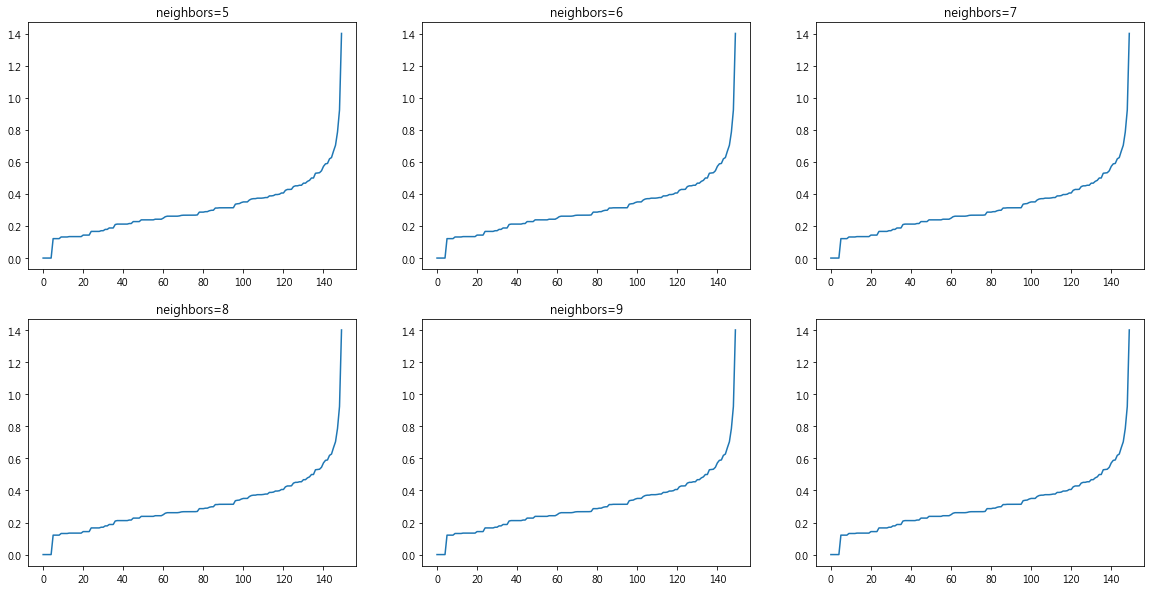

In [20]:
Best_eps(X)

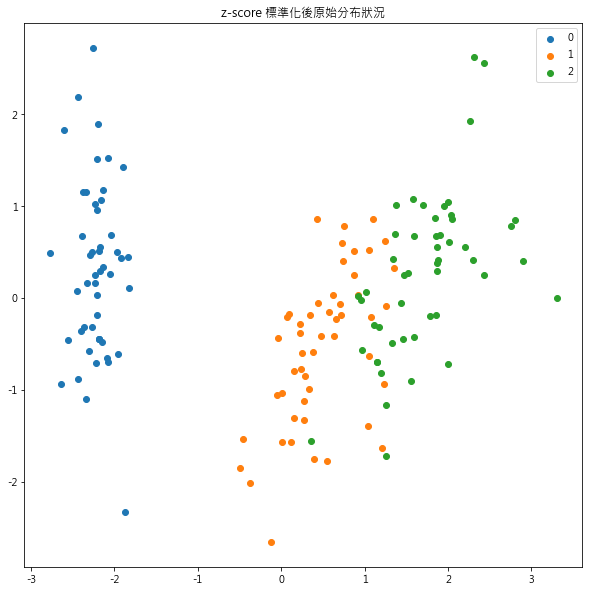

In [21]:
PCA_illustrator(X , y, 'z-score 標準化後原始分布狀況')

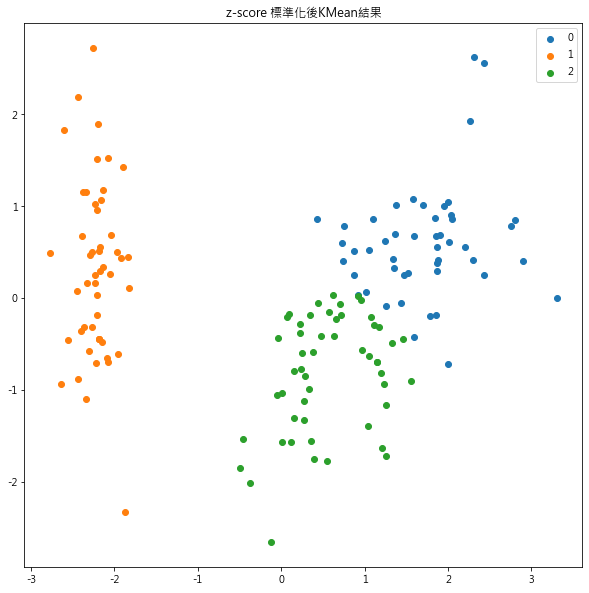

In [22]:
PCA_illustrator(X ,k_mean(), 'z-score 標準化後KMean結果')

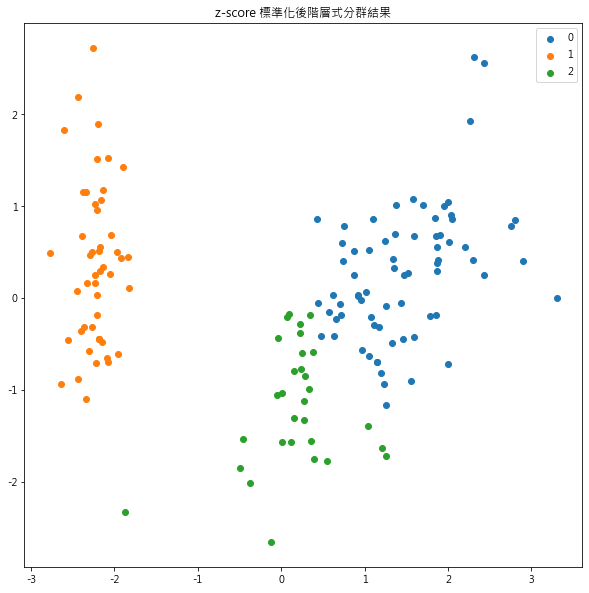

In [23]:
PCA_illustrator(X ,AgglomerativeClustering(), 'z-score 標準化後階層式分群結果')

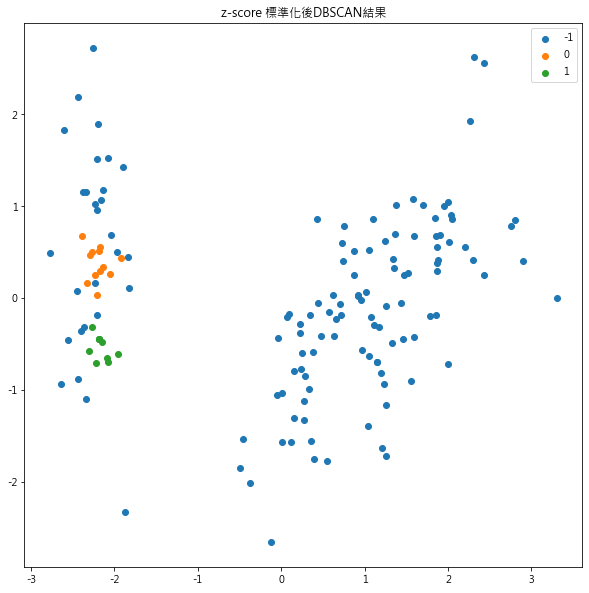

In [24]:
PCA_illustrator(X ,DBSCAN(), 'z-score 標準化後DBSCAN結果')

## 結果整理

In [25]:
print('---直接處理---')
print(kmean_purity_list[0])
print(Agglo_purity_list[0])
print(DBSCAN_purity_list[0])
print('---MinMax處理---')
print(kmean_purity_list[1])
print(Agglo_purity_list[1])
print(DBSCAN_purity_list[1])
print('---Z-score處理---')
print(kmean_purity_list[2])
print(Agglo_purity_list[2])
print(DBSCAN_purity_list[2])

---直接處理---
0.8933333333333333
0.8933333333333333
0.6266666666666667
---MinMax處理---
0.8866666666666667
0.8866666666666667
0.66
---Z-score處理---
0.8333333333333334
0.8266666666666667
0.7333333333333333


## 建構 dendrogram


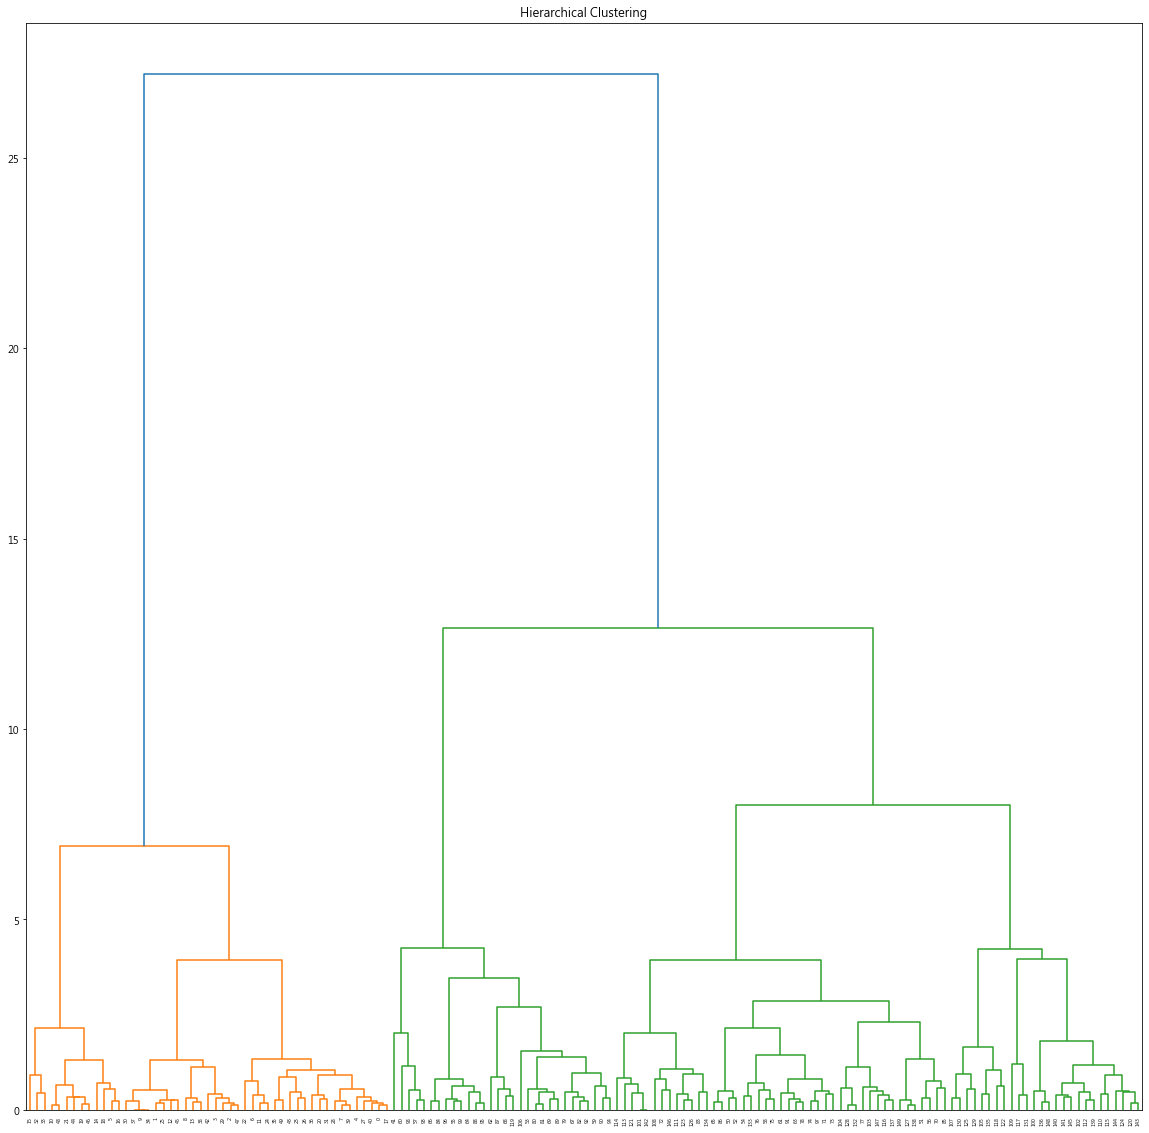

In [26]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,20))
plt.title('Hierarchical Clustering')
dis = sch.linkage(X, metric='euclidean', method='ward')
sch.dendrogram(dis)
plt.show()


## 選擇 eps,min_samples

NameError: name 'pred_y' is not defined

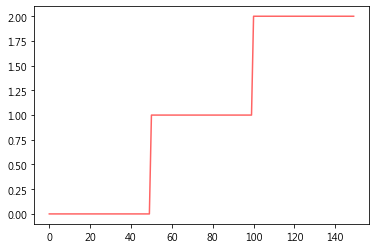

In [27]:

plt.plot(y,color=(255/255,100/255,100/255))
plt.plot(pred_y, color=(100/255,100/255,255/255))

plt.ylabel("Accuracy")
plt.xlabel("Depth_of_tree")
plt.title("Adult_dataset_accuracy")
plt.xlim([0,150])
plt.ylim([0,3])
plt.grid(True)

plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1, min_samples=1).fit(X)
pred_y = clustering.labels_
allcol=['sepal_length', 'sepal_width',
              'petal_length', 'petal_width']
X_axis="sepal_length"

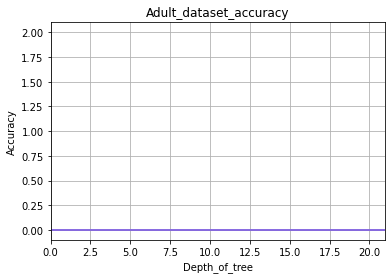

In [ ]:

plt.plot(y,color=(255/255,100/255,100/255))
plt.plot(pred_y,color=(100/255,100/255,255/255))

plt.ylabel("Accuracy")
plt.xlabel("Depth_of_tree")
plt.title("Adult_dataset_accuracy")
plt.xlim([0,21])
plt.grid(True)

plt.show()

In [ ]:

plt.scatter(X[X_axis],y,c='r')
plt.scatter(X[X_axis],pred_y,c='b')
plt.xlabel(X_axis)
plt.ylabel('y')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 432x288 with 0 Axes>

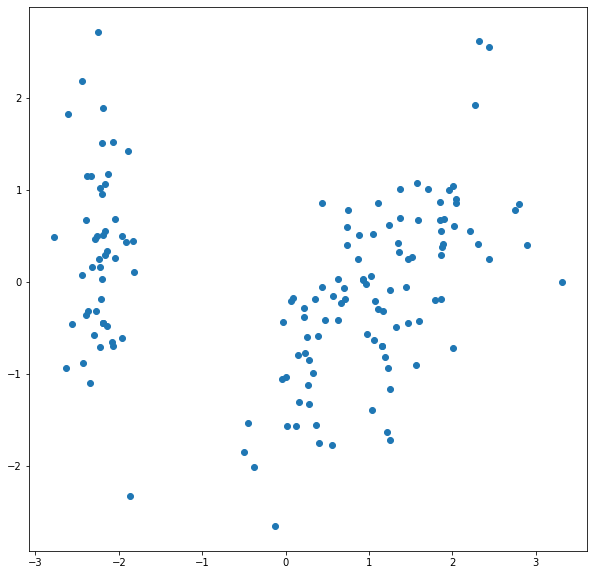

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

X_pca.shape
plt.clf()
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:,0], X_pca[:, 1])
plt.xlabel('')
plt.ylabel('')    
plt.show()

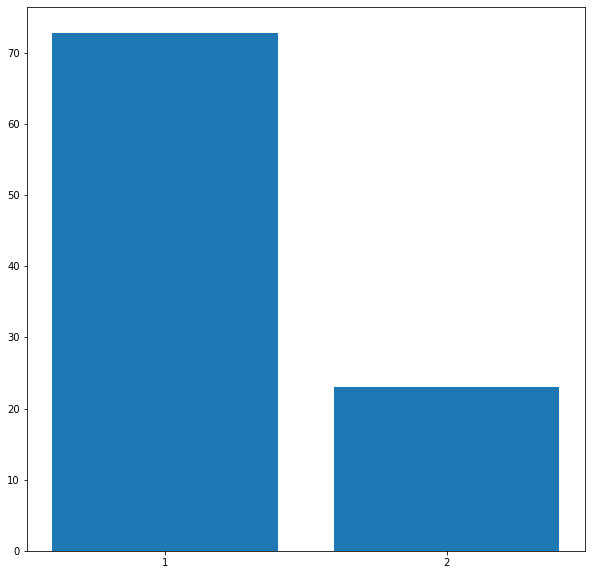

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)
data = pca.fit_transform(X)
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

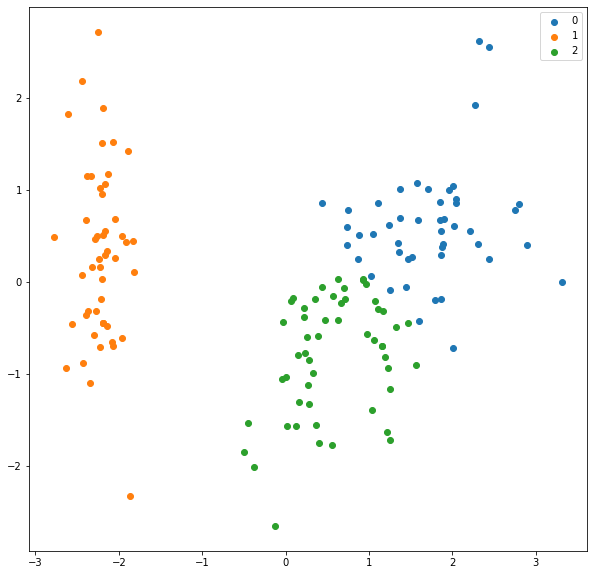

In [ ]:
from sklearn.cluster import KMeans
#centers = np.array(model2.cluster_centers_)
model = KMeans(n_clusters = 3, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
#plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

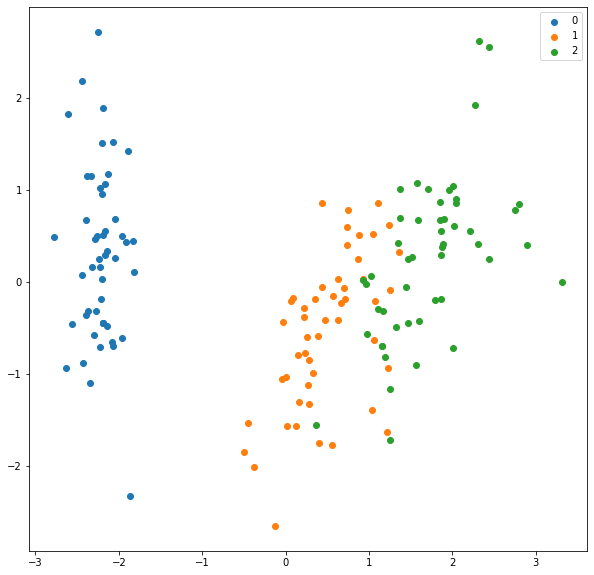

In [ ]:
plt.figure(figsize=(10,10))
uniq = np.unique(y)
for i in uniq:
   plt.scatter(data[y == i , 0] , data[y == i , 1] , label = i)
#plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()